<font color=black>

# Project Report

</font>

## Data Description


The dataset consists of 3 files, the contents of which have been elaborated below:

Securities.csv- This dataset provides a general description of each company, such as company name, address, the sector and sub-industry it belongs to, date when the Form 10-K was first filed and CIK number ( a Central Identification number, unique to each company).

Fundamentals.csv -This dataset contains metrics extracted from the annual SEC 10K filings (2012-2016). This file has most of the important financial metrics we wish to consider. It lists the accounts payable/receivable amounts for a company for each period the form was submitted, cash equivalents held by the company, common stocks, Deferred Asset/Liability  charges, depreciation amounts, earnings before and after tax, fixed assets, gross profit, long term debt amounts, total revenue, liabilities etc.

Prices.csv -This File has raw, daily, stock prices like the opening and closing price, and the highest and lowest stock value in that interval. Most of data spans from 2010 to the end 2016, for companies new on the stock market, the date range is shorter. 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [61]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

In [3]:
# Importing the datasets

fundamentals = pd.read_excel('fundamentals.xlsx')

prices = pd.read_excel('prices.xlsx')

securities = pd.read_excel('securities.xlsx')


# Exploratory Data Analysis (EDA)

In [4]:
fundamentals.shape
prices.shape
securities.shape

(1781, 78)

(851264, 7)

(505, 8)

### Getting the first 10 observations from each dataset

In [5]:
fundamentals.head(10)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53.0,1330000000,...,7072000000,9011000000,-7987000000,24891000000,16904000000,24855000000,-367000000,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75.0,2175000000,...,14323000000,13806000000,-2731000000,45009000000,42278000000,26743000000,0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60.0,1768000000,...,11750000000,13404000000,2021000000,41204000000,43225000000,42650000000,0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5102000000,352000000,-708000000,135,-6151000000,11591000000,51.0,1085000000,...,9985000000,13605000000,5635000000,42780000000,48415000000,40990000000,0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2409453000,-89482000,600000,32,-271182000,520215000,23.0,598111000,...,3184200000,2559638000,1210694000,3403120000,4613814000,6205003000,-27095000,2012.0,5.29,7.328355e+07
5,AAP,2013-12-28,2609239000,-32428000,2698000,26,-195757000,531293000,40.0,1112471000,...,3989384000,2764785000,1516205000,4048569000,5564774000,6493814000,-107890000,2013.0,5.36,7.308918e+07
6,AAP,2015-01-03,3616038000,-48209000,3092000,25,-228446000,562945000,3.0,104671000,...,4741040000,3654416000,2002912000,5959446000,7962358000,9843861000,-113044000,2014.0,6.75,7.315926e+07
7,AAP,2016-01-02,3757085000,-21476000,-7484000,19,-234747000,603332000,2.0,90782000,...,4940746000,3797477000,2460648000,5673917000,8134565000,9737018000,-119709000,2015.0,6.45,7.339504e+07
8,AAPL,2013-09-28,36223000000,-1949000000,1156000000,30,-8165000000,0,93.0,14259000000,...,73286000000,43658000000,123549000000,83451000000,207000000000,170910000000,0,2013.0,40.03,9.252311e+08
9,AAPL,2014-09-27,48649000000,-6452000000,980000000,35,-9571000000,0,40.0,13844000000,...,68531000000,63448000000,111547000000,120292000000,231839000000,182795000000,0,2014.0,6.49,6.087827e+09


In [7]:
prices.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500


In [8]:
securities.head(10)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2016-05-03,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaT,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",1976-06-30,1122304


In [9]:
# Checking for null values in the fundamentals dataset

fundamentals.isnull().any()

# There are missing values in quite a lot of columns. However, we are only concerned with the gross profit column for now. 
# Gross profit column does not have any missing values. 

Ticker Symbol                                          False
Period Ending                                          False
Accounts Payable                                       False
Accounts Receivable                                    False
Add'l income/expense items                             False
After Tax ROE                                          False
Capital Expenditures                                   False
Capital Surplus                                        False
Cash Ratio                                              True
Cash and Cash Equivalents                              False
Changes in Inventories                                 False
Common Stocks                                          False
Cost of Revenue                                        False
Current Ratio                                           True
Deferred Asset Charges                                 False
Deferred Liability Charges                             False
Depreciation            

Checking for null values in the prices dataset.
Prices dataset does not have any null values.

In [10]:
prices.isnull().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

Checking for null values in the securities dataset
The 'Date first added' column has some missing values, however, we are not concerned with that column for now

In [11]:
securities.isnull().any()

Ticker symbol              False
Security                   False
SEC filings                False
GICS Sector                False
GICS Sub Industry          False
Address of Headquarters    False
Date first added            True
CIK                        False
dtype: bool

In [12]:
# Descriptive Statistics for 'Gross Profit' column
fundamentals.columns

fundamentals['Gross Profit'].describe()

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

count    1.781000e+03
mean     7.189010e+09
std      1.360778e+10
min     -1.264700e+10
25%      1.581900e+09
50%      2.991000e+09
75%      6.944000e+09
max      1.494530e+11
Name: Gross Profit, dtype: float64

Dividing the gross profit column by 1e+09 (1 billion) to make the observations readable


In [13]:
fundamentals['Gross Profit'] = fundamentals['Gross Profit']/1000000000

In [14]:
fundamentals['Gross Profit'].head()
fundamentals['Gross Profit'].describe()


0    14.356000
1    15.724000
2    27.030000
3    29.894000
4     3.098036
Name: Gross Profit, dtype: float64

count    1781.000000
mean        7.189010
std        13.607785
min       -12.647000
25%         1.581900
50%         2.991000
75%         6.944000
max       149.453000
Name: Gross Profit, dtype: float64

Text(0.5, 0, 'Gross Profits (Billions)')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 1.0, 'Distribution of Gross Profits')

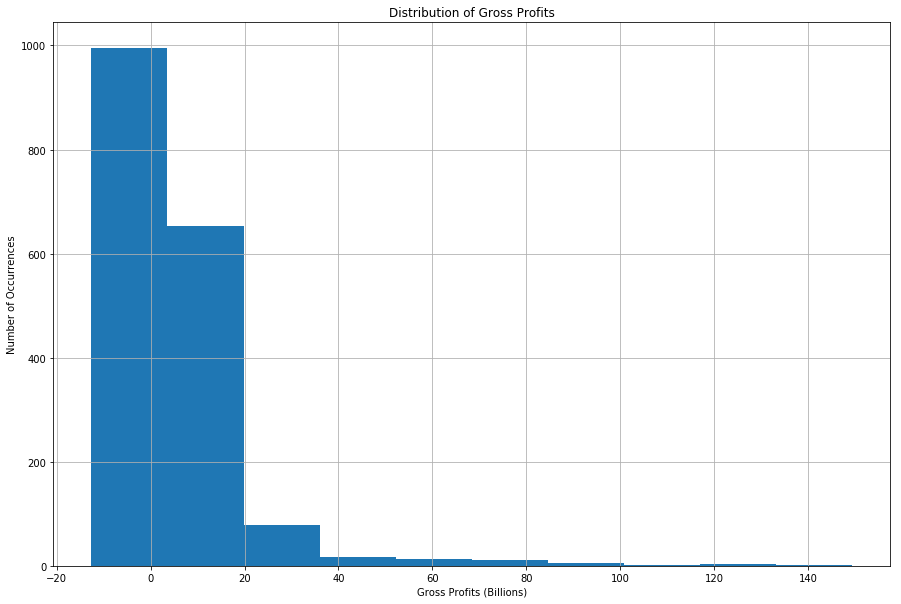

In [16]:
fundamentals['Gross Profit'].plot(kind = 'hist', figsize = (15, 10))
plt.grid(True)
plt.xlabel("Gross Profits (Billions)")
plt.ylabel('Number of Occurrences')
plt.title("Distribution of Gross Profits")

Data Preprocessing and
getting the relavant columns from the fundamentals dataset.

In [17]:
fun_actual = fundamentals.loc[:, ['Ticker Symbol', 'Gross Profit']]
fun_actual

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


In [18]:
fun_actual = pd.DataFrame(fun_actual)
fun_actual.head(10)   
# Note: Gross Profit is in Billions

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


Getting relevant columns from the securities dataset 


In [19]:
securities.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [20]:
# Getting the unique values 
securities['Ticker symbol'].unique()

# The number of unique values 
securities['Ticker symbol'].nunique()

# There are 505 unique values. This means there are 505 companies in the dataset

array(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES',
       'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ALXN',
       'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC',
       'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANTM', 'AON', 'APA', 'AIV',
       'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP',
       'AN', 'AZO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BCR', 'BAX',
       'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG',
       'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG',
       'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX',
       'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CTXS', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA',
       'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY',


505

In [21]:
sec_actual = securities.loc[:, ['Ticker symbol','Security', 'GICS Sector']]
sec_actual = pd.DataFrame(sec_actual)
sec_actual.head(10)

,Ticker symbol,Security,GICS Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology
5,AYI,Acuity Brands Inc,Industrials
6,ADBE,Adobe Systems Inc,Information Technology
7,AAP,Advance Auto Parts,Consumer Discretionary
8,AES,AES Corp,Utilities
9,AET,Aetna Inc,Health Care


## Final look at the 2 datasets


In [22]:
fun_actual.head(10)
sec_actual.head(10)

,Ticker Symbol,Gross Profit
0,AAL,14.356000
1,AAL,15.724000
2,AAL,27.030000
3,AAL,29.894000
4,AAP,3.098036
5,AAP,3.252146
6,AAP,4.453613
7,AAP,4.422772
8,AAPL,64.304000
9,AAPL,70.537000


,Ticker symbol,Security,GICS Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology
5,AYI,Acuity Brands Inc,Industrials
6,ADBE,Adobe Systems Inc,Information Technology
7,AAP,Advance Auto Parts,Consumer Discretionary
8,AES,AES Corp,Utilities
9,AET,Aetna Inc,Health Care


## Merging the 2 datasets


In [23]:
sec_actual['Ticker Symbol'] = sec_actual['Ticker symbol']
sec_actual.head(10)

,Ticker symbol,Security,GICS Sector,Ticker Symbol
0,MMM,3M Company,Industrials,MMM
1,ABT,Abbott Laboratories,Health Care,ABT
2,ABBV,AbbVie,Health Care,ABBV
3,ACN,Accenture plc,Information Technology,ACN
4,ATVI,Activision Blizzard,Information Technology,ATVI
5,AYI,Acuity Brands Inc,Industrials,AYI
6,ADBE,Adobe Systems Inc,Information Technology,ADBE
7,AAP,Advance Auto Parts,Consumer Discretionary,AAP
8,AES,AES Corp,Utilities,AES
9,AET,Aetna Inc,Health Care,AET


In [24]:
sec_actual.drop(['Ticker symbol'], axis = 1)
sec_actual.head(10)

,Security,GICS Sector,Ticker Symbol
0,3M Company,Industrials,MMM
1,Abbott Laboratories,Health Care,ABT
2,AbbVie,Health Care,ABBV
3,Accenture plc,Information Technology,ACN
4,Activision Blizzard,Information Technology,ATVI
5,Acuity Brands Inc,Industrials,AYI
6,Adobe Systems Inc,Information Technology,ADBE
7,Advance Auto Parts,Consumer Discretionary,AAP
8,AES Corp,Utilities,AES
9,Aetna Inc,Health Care,AET


,Ticker symbol,Security,GICS Sector,Ticker Symbol
0,MMM,3M Company,Industrials,MMM
1,ABT,Abbott Laboratories,Health Care,ABT
2,ABBV,AbbVie,Health Care,ABBV
3,ACN,Accenture plc,Information Technology,ACN
4,ATVI,Activision Blizzard,Information Technology,ATVI
5,AYI,Acuity Brands Inc,Industrials,AYI
6,ADBE,Adobe Systems Inc,Information Technology,ADBE
7,AAP,Advance Auto Parts,Consumer Discretionary,AAP
8,AES,AES Corp,Utilities,AES
9,AET,Aetna Inc,Health Care,AET


Merging the datasets on the 'Ticker Symbol' column

In [25]:
data = fun_actual.merge(sec_actual, on = 'Ticker Symbol', how = 'inner')
data.head(10)

,Ticker Symbol,Gross Profit,Ticker symbol,Security,GICS Sector
0,AAL,14.356000,AAL,American Airlines Group,Industrials
1,AAL,15.724000,AAL,American Airlines Group,Industrials
2,AAL,27.030000,AAL,American Airlines Group,Industrials
3,AAL,29.894000,AAL,American Airlines Group,Industrials
4,AAP,3.098036,AAP,Advance Auto Parts,Consumer Discretionary
5,AAP,3.252146,AAP,Advance Auto Parts,Consumer Discretionary
6,AAP,4.453613,AAP,Advance Auto Parts,Consumer Discretionary
7,AAP,4.422772,AAP,Advance Auto Parts,Consumer Discretionary
8,AAPL,64.304000,AAPL,Apple Inc.,Information Technology
9,AAPL,70.537000,AAPL,Apple Inc.,Information Technology


## This is our final dataset

In [26]:
# Dropping the extra 'Ticker symbol' column 
data = data.drop(['Ticker symbol'], axis = 1)
data.head(10)

,Ticker Symbol,Gross Profit,Security,GICS Sector
0,AAL,14.356000,American Airlines Group,Industrials
1,AAL,15.724000,American Airlines Group,Industrials
2,AAL,27.030000,American Airlines Group,Industrials
3,AAL,29.894000,American Airlines Group,Industrials
4,AAP,3.098036,Advance Auto Parts,Consumer Discretionary
5,AAP,3.252146,Advance Auto Parts,Consumer Discretionary
6,AAP,4.453613,Advance Auto Parts,Consumer Discretionary
7,AAP,4.422772,Advance Auto Parts,Consumer Discretionary
8,AAPL,64.304000,Apple Inc.,Information Technology
9,AAPL,70.537000,Apple Inc.,Information Technology


We are going to choose 4 GICS Sectors: Industrials, Health Care, Information Technology, and Telecommunications Services

In [27]:
data_ind = data[data['GICS Sector'] == 'Industrials']

In [28]:
data_ind.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                        GICS Sector
AAL            American Airlines Group         Industrials    29.894000
ALK            Alaska Air Group Inc            Industrials     3.663000
ALLE           Allegion                        Industrials     0.985300
AME            AMETEK Inc                      Industrials     1.425015
ARNC           Arconic Inc                     Industrials     4.769000
AYI            Acuity Brands Inc               Industrials     1.436200
BA             Boeing Company                  Industrials    14.026000
CAT            Caterpillar Inc.                Industrials    14.202000
CHRW           C. H. Robinson Worldwide        Industrials     2.268480
CMI            Cummins Inc.                    Industrials     4.947000
COL            Rockwell Collins                Industrials     1.617000
CSX            CSX Corp.                       Industrials     8.569000
CTAS           Cintas Corporation              Industrials     2.129870
DAL  

In [30]:
data_ind.loc[data_ind['Gross Profit'].idxmax()]

# UPS has the highest average Gross Profit in the Industrial Sector

Ticker Symbol                      UPS
Gross Profit                    45.416
Security         United Parcel Service
GICS Sector                Industrials
Name: 1609, dtype: object

## Telecommunications Services


In [31]:
data_tel = data[data['GICS Sector'] == 'Telecommunications Services']

In [32]:
data_tel.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                 GICS Sector                
CTL            CenturyLink Inc          Telecommunications Services    10.737
FTR            Frontier Communications  Telecommunications Services     5.576
LVLT           Level 3 Communications   Telecommunications Services     3.964
T              AT&T Inc                 Telecommunications Services    79.755
VZ             Verizon Communications   Telecommunications Services    79.063
Name: Gross Profit, dtype: float64

In [33]:
data_tel.loc[data_tel['Gross Profit'].idxmax()]

# AT&T has the highest average Gross Profit in the Telecommunications Services sector. 

Ticker Symbol                              T
Gross Profit                          79.755
Security                            AT&T Inc
GICS Sector      Telecommunications Services
Name: 1497, dtype: object

##  Information Technology


In [34]:
data_IT = data[data['GICS Sector'] == 'Information Technology']

In [35]:
data_IT.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                                GICS Sector           
AAPL           Apple Inc.                              Information Technology    93.626000
ADBE           Adobe Systems Inc                       Information Technology     5.034522
ADI            Analog Devices, Inc.                    Information Technology     2.259262
ADS            Alliance Data Systems                   Information Technology     1.957046
ADSK           Autodesk Inc                            Information Technology     2.170100
AKAM           Akamai Technologies Inc                 Information Technology     1.471828
AMAT           Applied Materials Inc                   Information Technology     4.511000
APH            Amphenol Corp                           Information Technology     1.779500
ATVI           Activision Blizzard                     Information Technology     3.194000
AVGO           Broadcom                                Information Technology     5.940000
CRM         

In [36]:
data_IT.loc[data_IT['Gross Profit'].idxmax()]

# Apple has the highest average Gross Profit in the Information Technology Sector. 

Ticker Symbol                      AAPL
Gross Profit                     93.626
Security                     Apple Inc.
GICS Sector      Information Technology
Name: 10, dtype: object

## Health Care Sector


In [37]:
data_health = data[data['GICS Sector'] == 'Health Care']

In [38]:
data_health.groupby(['Ticker Symbol', 'Security','GICS Sector'])['Gross Profit'].max()

Ticker Symbol  Security                             GICS Sector
ABBV           AbbVie                               Health Care    18.359000
ABC            AmerisourceBergen Corp               Health Care     4.272606
ABT            Abbott Laboratories                  Health Care    11.658000
ALXN           Alexion Pharmaceuticals              Health Care     2.826000
AMGN           Amgen Inc                            Health Care    18.829000
ANTM           Anthem Inc.                          Health Care    18.039600
BAX            Baxter International Inc.            Health Care     7.134000
BCR            Bard (C.R.) Inc.                     Health Care     2.342300
BDX            Becton Dickinson                     Health Care     5.991000
BIIB           BIOGEN IDEC Inc.                     Health Care     9.970100
BMY            Bristol-Myers Squibb                 Health Care    13.011000
BSX            Boston Scientific                    Health Care     5.304000
CAH         

In [107]:
data_health.loc[data_health['Gross Profit'].idxmax()]

# United Health Group has the highest average Gross Profit in the Health Care Sector. 

Ticker Symbol                         UNH
Gross Profit                       67.802
Security         United Health Group Inc.
GICS Sector                   Health Care
Name: 1597, dtype: object

### There are 4 companies for which we are predicting the stock prices for using Recurrent Neural Networks: 

#### 1. United Parcel Services (UPS) from Industrial Sector.
#### 2. AT&T        from                   Telecommunications Services. 
#### 3. Apple       from                  Information Technology Sector.
#### 4. United Health Group  from          Health Care Sector.

# RNN for United Parcel Services (UPS)

In [39]:
prices.shape

(851264, 7)

Filtering to only get prices for UPS. We are going to make a Recurrent Neural Network model to predict the stock price for December 2016. 

In [41]:
prices_ups = prices[prices['symbol'] == 'UPS']
prices_ups.head(30)
prices_ups.tail(30)

,date,symbol,open,close,low,high,volume
675,2010-01-04,UPS,58.180000,58.180000,57.980000,58.820000,3897200
1143,2010-01-05,UPS,58.250000,58.279999,58.119999,59.000000,5966300
1611,2010-01-06,UPS,58.209999,57.849998,57.810001,58.270000,5770200
2079,2010-01-07,UPS,57.959999,57.410000,57.189999,57.959999,5747000
2547,2010-01-08,UPS,59.770000,60.169998,59.520000,61.130001,13779300
3015,2010-01-11,UPS,60.549999,62.820000,60.500000,63.380001,13744900
3483,2010-01-12,UPS,62.520000,62.400002,62.099998,62.939999,5662500
3951,2010-01-13,UPS,63.130001,62.070000,61.930000,63.220001,5822600
4419,2010-01-14,UPS,61.860001,62.200001,61.830002,62.360001,4698000
4887,2010-01-15,UPS,62.200001,61.930000,61.720001,62.400002,6066300


,date,symbol,open,close,low,high,volume
836717,2016-11-17,UPS,112.919998,113.489998,112.510002,113.559998,1618300
837217,2016-11-18,UPS,113.730003,114.089996,113.250000,114.309998,1987800
837717,2016-11-21,UPS,114.089996,114.699997,113.620003,114.730003,1849200
838217,2016-11-22,UPS,114.940002,114.629997,114.400002,115.000000,1983900
838717,2016-11-23,UPS,114.849998,115.680000,114.849998,115.750000,1855400
839217,2016-11-25,UPS,115.790001,116.260002,115.769997,116.389999,1077600
839717,2016-11-28,UPS,116.260002,115.690002,115.449997,116.470001,2628600
840217,2016-11-29,UPS,115.940002,116.279999,115.769997,116.480003,2733500
840717,2016-11-30,UPS,116.459999,115.919998,115.919998,116.959999,3318200
841217,2016-12-01,UPS,116.040001,116.430000,115.879997,116.760002,2484200


In [42]:
dataset_train = prices_ups[prices_ups['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

## We will train our data over the years 2010 to 2016

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

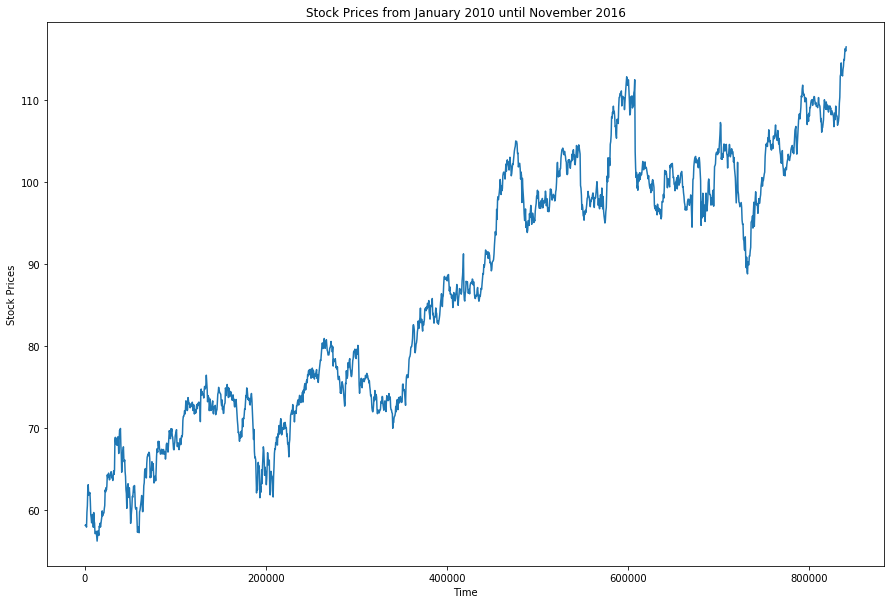

In [43]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

One of the advantages of using RNN is that we do not need to make the data stationary. Recurrent Neural Networks are robust to noise in the input data, and do not make any assumptions about the mapping functions. RNN can readily learn linear and non linear relationships. 

In [44]:
# Feature Scaling
# Feature scaling is an important part of RNN because the calculations are very computer intensive and therefore it is necessary for the values to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [45]:
training_set_scaled.shape

(1741, 1)

Creating a data structure with 60 timesteps and 1 output. 60 timesteps means that at each time 't', RNN is going to look at 60 stockprices before time 't' i.e. stockprices that are 60 days before time 't' and based on the trends, it will predict the next output. 

Since, there are 20 financial days in 1 month, 60 timesteps would equal 3 months. Therefore, we are using 3 months of previous data in order to predict the opening stock price for the next day. 

Now, X_train contains 60 previous price days and y_train contains the next output. 

In [46]:
X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

Here, 1681 is the total number of stock prices we have, 60 is the number of timesteps, and 1 is the number of predictors i.e. the opening stock price

In [48]:
# Building the RNN

import tensorflow
tensorflow.__version__

from tensorflow import keras

keras.__version__

'1.13.1'

'2.2.4-tf'

In [49]:
# Importing the Packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN

regressor = Sequential()

Using TensorFlow backend.


In [50]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'units = 50' is the number of LSTM cells i.e. the number if neurons in the first LSTM layer. We have chosen 50 to get high dimensionality and capture complex trends. 

'return_sequences = True' means we are adding another LSTM layer afterwards. 

'Dropout(0.2)' means 20% of the neurons in the LSTM layers will be ignored during each iteration to prevent overfitting. 

In [51]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0394
# Ended with a loss of 0.00077

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1681/1681 [==============================] - 39s 23ms/step - loss: 0.0394
Epoch 2/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0033
Epoch 3/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0029
Epoch 4/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0027
Epoch 5/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0029
Epoch 6/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0028
Epoch 7/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0024
Epoch 8/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0024
Epoch 9/50
1681/1681 [==============================] - 30s 18ms/step - loss: 0.0022
Epoch 10/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0021
Epoch 11/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0020
Epoch 12/50
168

In [53]:
dataset_test = prices_ups[prices_ups['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841217,2016-12-01,UPS,116.040001,116.430000,115.879997,116.760002,2484200
841717,2016-12-02,UPS,116.690002,116.349998,116.000000,117.010002,2084900
842217,2016-12-05,UPS,116.910004,116.559998,116.360001,116.949997,2304900
842717,2016-12-06,UPS,116.500000,116.540001,116.029999,116.720001,1735600
843217,2016-12-07,UPS,116.269997,118.620003,116.269997,118.790001,2495100


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

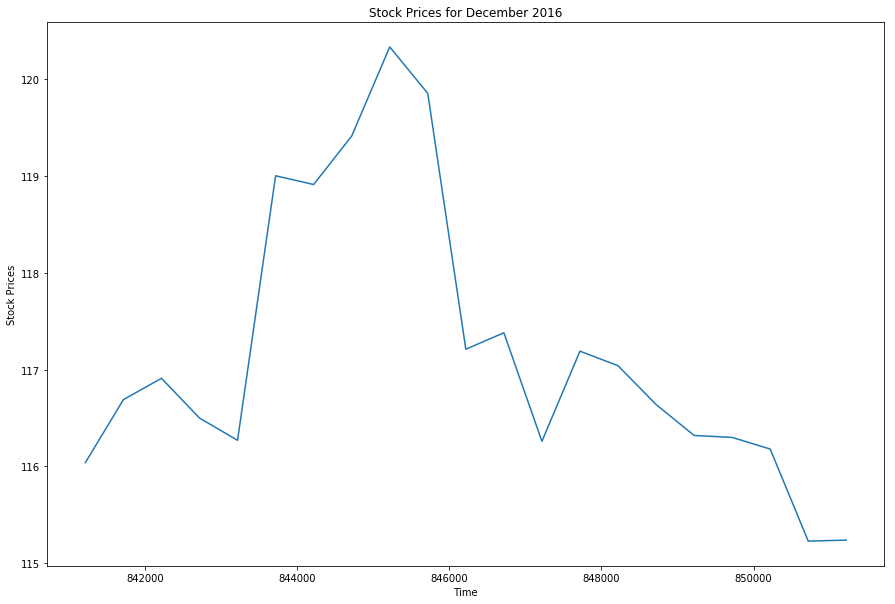

In [54]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [55]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [56]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_ups = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_ups = dataset_total_ups[len(dataset_total_ups) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [57]:
# Reshaping to get the right np shape

inputs_ups = inputs_ups.reshape(-1, 1)

inputs_ups = sc.transform(inputs_ups)

# Creating special dataset structure for our test set

X_test_ups = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_ups.append(inputs_ups[i - 60:i, 0])
     
X_test_ups = np.array(X_test_ups)

X_test_ups = np.reshape(X_test_ups, (20, 60, 1)) 

# Here, '20' is the number of days to predict and 60 is the number of timesteps. 

In [58]:
predicted_stock_price_ups = regressor.predict(X_test_ups)        # Predicting the stock price

predicted_stock_price_ups = sc.inverse_transform(predicted_stock_price_ups)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

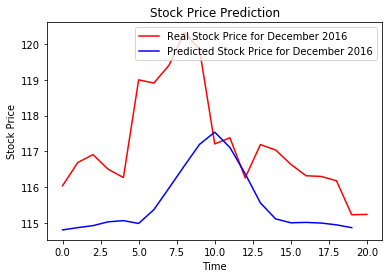

In [59]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_ups, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

We have correctly predicted the trend of the UPS stock price for the month of December 2016. 

In [64]:
# Computing the RMSE
rmse_ups = math.sqrt(mean_squared_error(real_stock_price[0:20, 0], predicted_stock_price_ups))
r = np.ptp(real_stock_price[0:20, 0], axis = 0)

# Relative RMSE
rmse_ups/r

0.4114063973308585

# RNN for AT&T

In [87]:
# Filtering to only get prices for AT&T 

prices_T = prices[prices['symbol'] == 'T']
prices_T.head(30)
prices_T.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
648,2010-01-04,T,28.410000,28.580000,28.280001,28.610001,29136600
1116,2010-01-05,T,28.700001,28.440001,28.350000,28.730000,35234500
1584,2010-01-06,T,27.950001,27.610001,27.549999,28.030001,37894600
2052,2010-01-07,T,27.580000,27.299999,27.120001,27.690001,33600300
2520,2010-01-08,T,27.290001,27.100000,26.879999,27.389999,27633400
2988,2010-01-11,T,27.180000,26.969999,26.850000,27.219999,25791200
3456,2010-01-12,T,26.850000,26.959999,26.780001,27.110001,26307800
3924,2010-01-13,T,27.000000,26.639999,26.530001,27.100000,42590900
4392,2010-01-14,T,26.639999,26.190001,26.080000,26.850000,42246100
4860,2010-01-15,T,26.250000,25.790001,25.650000,26.270000,64018300


,date,symbol,open,close,low,high,volume
836688,2016-11-17,T,37.299999,37.410000,37.270000,37.689999,21184900
837188,2016-11-18,T,37.450001,37.560001,37.299999,37.610001,16982200
837688,2016-11-21,T,37.669998,37.740002,37.459999,37.740002,17247400
838188,2016-11-22,T,37.990002,38.549999,37.820000,38.740002,26152000
838688,2016-11-23,T,38.419998,38.730000,38.410000,38.970001,21343400
839188,2016-11-25,T,38.770000,39.209999,38.730000,39.209999,10844400
839688,2016-11-28,T,39.180000,39.540001,39.169998,39.669998,26656500
840188,2016-11-29,T,39.580002,39.480000,39.270000,39.630001,19857200
840688,2016-11-30,T,39.209999,38.630001,38.619999,39.209999,32679300
841188,2016-12-01,T,38.630001,38.880001,38.160000,38.910000,27398400


In [88]:
dataset_train = prices_T[prices_T['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

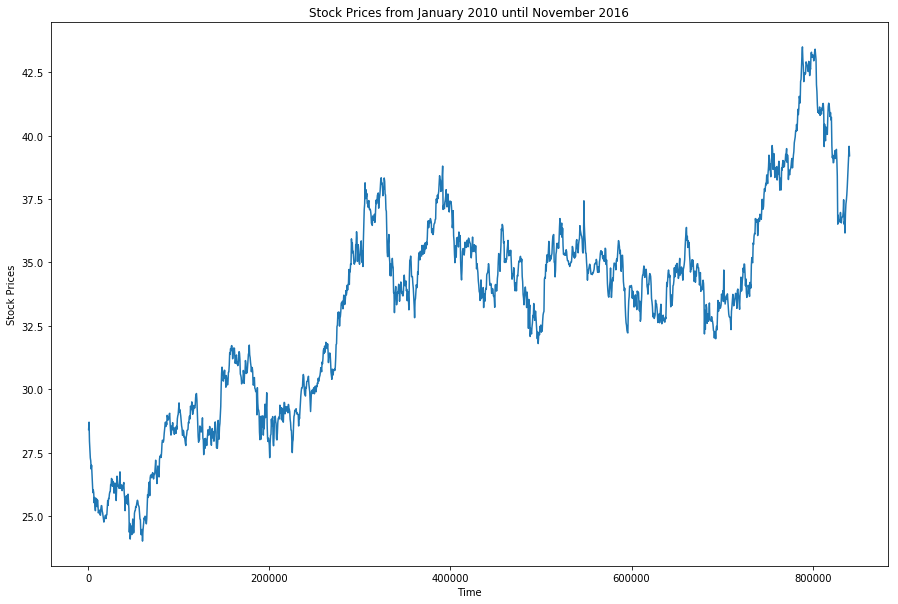

In [89]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [90]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [91]:
training_set_scaled.shape

(1741, 1)

In [92]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [93]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [94]:
# Initialising the RNN

regressor = Sequential()

In [95]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

In [96]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [97]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0304
# Ended with a loss of 0.00064

Epoch 1/50
1681/1681 [==============================] - 39s 23ms/step - loss: 0.0304
Epoch 2/50
1681/1681 [==============================] - 30s 18ms/step - loss: 0.0032
Epoch 3/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0029
Epoch 4/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0027
Epoch 5/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0027
Epoch 6/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0024
Epoch 7/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0025
Epoch 8/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0022
Epoch 9/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0021
Epoch 10/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0022
Epoch 11/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0020
Epoch 12/50
1681/1681 [==============================] - 28s 17

In [127]:
dataset_test = prices_T[prices_T['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841188,2016-12-01,T,38.630001,38.880001,38.160000,38.910000,27398400
841688,2016-12-02,T,38.840000,38.610001,38.470001,39.119999,16102200
842188,2016-12-05,T,38.700001,38.630001,38.630001,38.980000,20773400
842688,2016-12-06,T,38.779999,39.349998,38.700001,39.419998,23569800
843188,2016-12-07,T,39.490002,40.450001,39.439999,40.490002,32963400


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

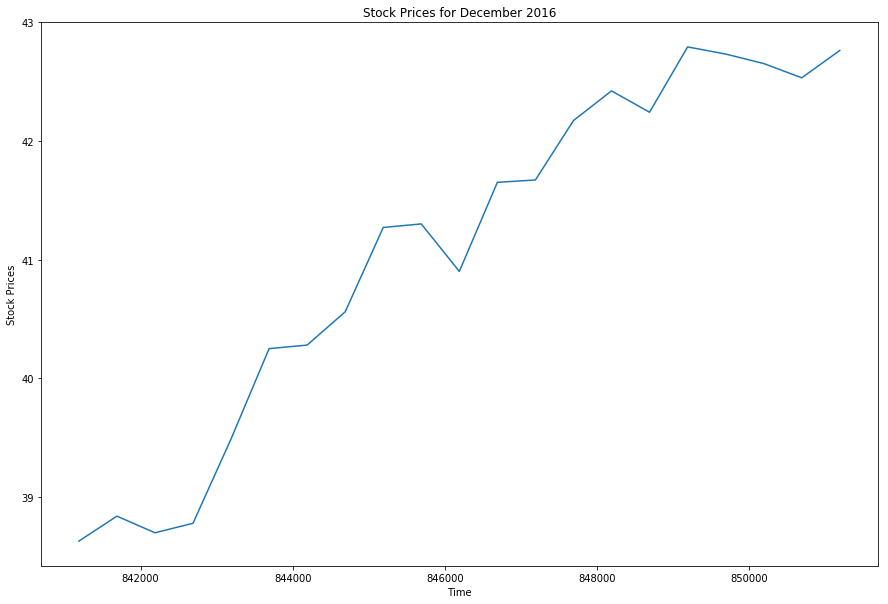

In [128]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [129]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [101]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_T = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_T = dataset_total_T[len(dataset_total_T) - len(dataset_test) - 60: ].values   # Inputs we need to predict the stock price of December 2016




In [102]:
# Reshaping to get the right np shape

inputs_T = inputs_T.reshape(-1, 1)

inputs_T = sc.transform(inputs_T)

# Creating special dataset structure for our test set

X_test_T = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_T.append(inputs_T[i - 60:i, 0])
     
X_test_T = np.array(X_test_T)

X_test_T = np.reshape(X_test_T, (20, 60, 1))

In [103]:
predicted_stock_price_T = regressor.predict(X_test_T)        # Predicting the stock price

predicted_stock_price_T = sc.inverse_transform(predicted_stock_price_T)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

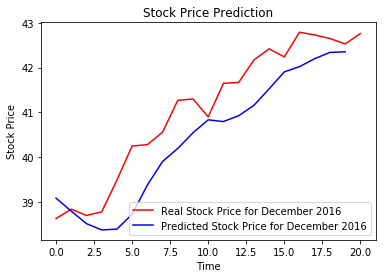

In [104]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_T, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

We have correctly predicted the trend of the AT&T stock price for the month of December 2016. 

In [130]:
# Computing the RMSE
rmse_T = math.sqrt(mean_squared_error(real_stock_price[0:20, 0], predicted_stock_price_T))
r = np.ptp(real_stock_price[0:20, 0], axis = 0)

# Relative RMSE
rmse_T/r

0.17914233405948554

# Running the RNN for Apple

In [106]:
prices_AAP = prices[prices['symbol'] == 'AAPL']
prices_AAP.head(30)
prices_AAP.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700
2593,2010-01-11,AAPL,30.400000,30.015715,29.778572,30.428572,115557400
3061,2010-01-12,AAPL,29.884285,29.674286,29.488571,29.967142,148614900
3529,2010-01-13,AAPL,29.695715,30.092857,29.157143,30.132856,151473000
3997,2010-01-14,AAPL,30.015715,29.918571,29.860001,30.065714,108223500
4465,2010-01-15,AAPL,30.132856,29.418571,29.410000,30.228571,148516900


,date,symbol,open,close,low,high,volume
836267,2016-11-17,AAPL,109.809998,109.949997,108.830002,110.349998,27632000
836767,2016-11-18,AAPL,109.720001,110.059998,109.660004,110.540001,28428900
837267,2016-11-21,AAPL,110.120003,111.730003,110.010002,111.989998,29264600
837767,2016-11-22,AAPL,111.949997,111.800003,111.400002,112.419998,25965500
838267,2016-11-23,AAPL,111.360001,111.230003,110.330002,111.510002,27426400
838767,2016-11-25,AAPL,111.129997,111.790001,110.949997,111.870003,11475900
839267,2016-11-28,AAPL,111.430000,111.570000,111.389999,112.470001,27194000
839767,2016-11-29,AAPL,110.779999,111.459999,110.070000,112.029999,28528800
840267,2016-11-30,AAPL,111.599998,110.519997,110.269997,112.199997,36162300
840767,2016-12-01,AAPL,110.370003,109.489998,109.029999,110.940002,37086900


In [107]:
dataset_train = prices_AAP[prices_AAP['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

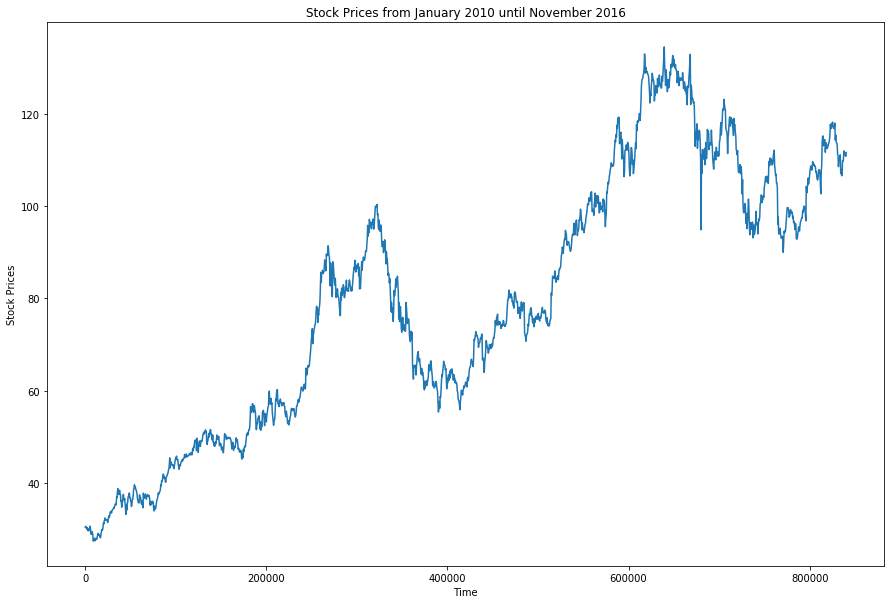

In [108]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [109]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [110]:
training_set_scaled.shape

(1741, 1)

In [111]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i - 60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [112]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [113]:
# Initialising the RNN

regressor = Sequential()

In [114]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

In [115]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [116]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0322
# Ended with a loss of 0.00079

Epoch 1/50
1681/1681 [==============================] - 40s 24ms/step - loss: 0.0322
Epoch 2/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0024
Epoch 3/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0023
Epoch 4/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0021
Epoch 5/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0023
Epoch 6/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0023
Epoch 7/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0025
Epoch 8/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0019
Epoch 9/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0016
Epoch 10/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0017
Epoch 11/50
1681/1681 [==============================] - 30s 18ms/step - loss: 0.0016
Epoch 12/50
1681/1681 [==============================] - 28s 17

In [117]:
dataset_test = prices_AAP[prices_AAP['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
840767,2016-12-01,AAPL,110.370003,109.489998,109.029999,110.940002,37086900
841267,2016-12-02,AAPL,109.169998,109.900002,108.849998,110.089996,26528000
841767,2016-12-05,AAPL,110.000000,109.110001,108.250000,110.029999,34324500
842267,2016-12-06,AAPL,109.500000,109.949997,109.190002,110.360001,26195500
842767,2016-12-07,AAPL,109.260002,111.029999,109.160004,111.190002,29998700


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

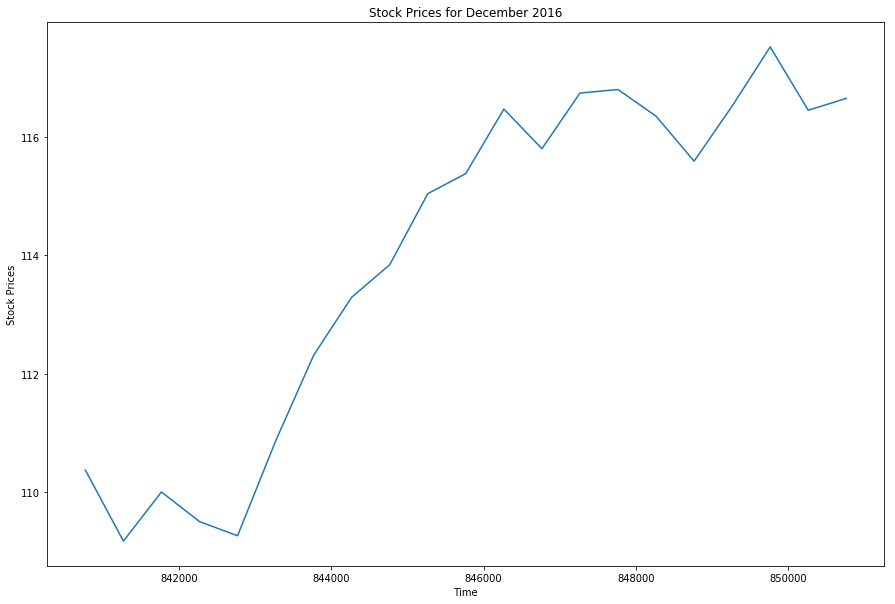

In [118]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [119]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [120]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_AAP = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_AAP = dataset_total_AAP[len(dataset_total_AAP) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [121]:
# Reshaping to get the right np shape

inputs_AAP = inputs_AAP.reshape(-1, 1)

inputs_AAP = sc.transform(inputs_AAP)

# Creating special dataset structure for our test set

X_test_AAP = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_AAP.append(inputs_AAP[i - 60:i, 0])
     
X_test_AAP = np.array(X_test_AAP)

X_test_AAP = np.reshape(X_test_AAP, (20, 60, 1))

In [122]:
predicted_stock_price_AAP = regressor.predict(X_test_AAP)        # Predicting the stock price

predicted_stock_price_AAP = sc.inverse_transform(predicted_stock_price_AAP)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

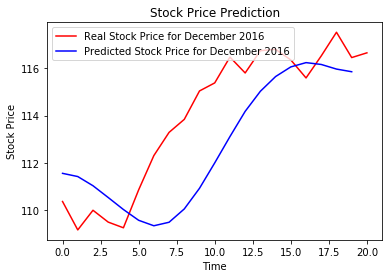

In [123]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_AAP, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

We have correctly predicted the trend of the Apple stock price for the month of December 2016. 

In [125]:
# Computing the RMSE
rmse_apple = math.sqrt(mean_squared_error(real_stock_price[0:20, 0], predicted_stock_price_AAP))
r = np.ptp(real_stock_price[0:20, 0], axis = 0)

# Relative RMSE
rmse_apple/r

0.26552014124854645

# Running the RNN for United Health Care

In [131]:
prices_UNH = prices[prices['symbol'] == 'UNH']
prices_UNH.head(30)
prices_UNH.tail(30)

# We are going to make a RNN model to predict the stock price for December 2016

,date,symbol,open,close,low,high,volume
672,2010-01-04,UNH,31.379999,31.530001,30.969999,31.600000,12199500
1140,2010-01-05,UNH,31.730000,31.480000,31.280001,31.969999,11180700
1608,2010-01-06,UNH,31.600000,31.790001,31.410000,32.060001,9761100
2076,2010-01-07,UNH,31.590000,33.009998,31.590000,33.049999,11789800
2544,2010-01-08,UNH,32.860001,32.700001,32.340000,32.919998,7228700
3012,2010-01-11,UNH,32.709999,32.919998,32.700001,33.130001,7206900
3480,2010-01-12,UNH,32.700001,32.049999,31.540001,32.910000,13121500
3948,2010-01-13,UNH,31.990000,32.540001,31.680000,32.549999,8797200
4416,2010-01-14,UNH,32.680000,33.320000,32.330002,33.330002,8818300
4884,2010-01-15,UNH,33.540001,33.750000,33.099998,33.990002,19382000


,date,symbol,open,close,low,high,volume
836714,2016-11-17,UNH,151.820007,150.770004,150.190002,151.919998,4683000
837214,2016-11-18,UNH,151.050003,149.449997,149.399994,151.660004,5664800
837714,2016-11-21,UNH,149.720001,150.410004,148.559998,150.660004,3867800
838214,2016-11-22,UNH,151.080002,152.259995,150.559998,152.929993,4992100
838714,2016-11-23,UNH,152.009995,153.539993,150.960007,153.740005,2697200
839214,2016-11-25,UNH,153.929993,152.809998,152.610001,154.500000,1664500
839714,2016-11-28,UNH,152.740005,152.110001,150.000000,152.850006,4988600
840214,2016-11-29,UNH,156.940002,157.589996,155.179993,158.119995,5827400
840714,2016-11-30,UNH,157.470001,158.320007,157.070007,159.759995,7142400
841214,2016-12-01,UNH,159.119995,160.940002,159.119995,161.720001,5198500


In [132]:
dataset_train = prices_UNH[prices_UNH['date'] < '2016-12-01']
training_set = dataset_train.iloc[:, 2:3].values

Text(0.5, 1.0, 'Stock Prices from January 2010 until November 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

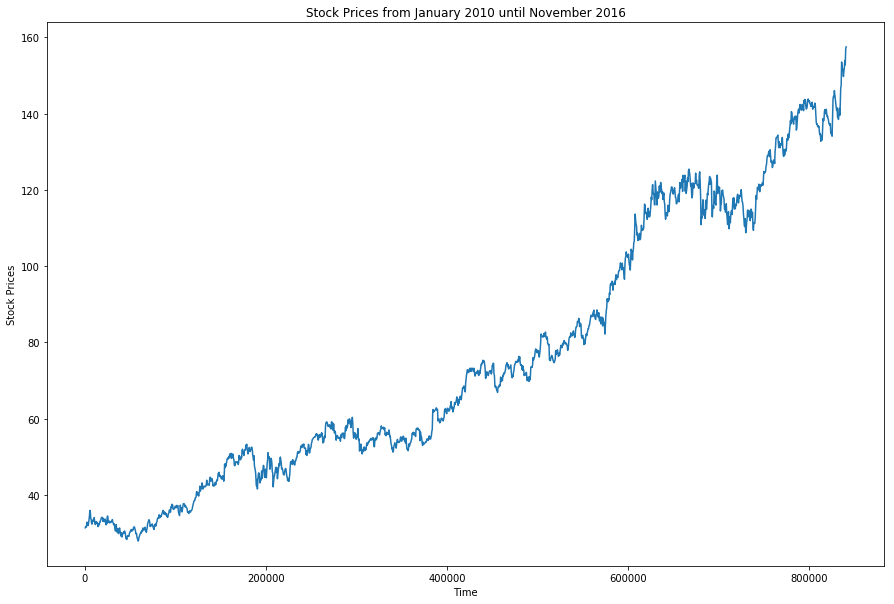

In [133]:
dataset_train['open'].plot(figsize = (15, 10))                       # Training Set 
plt.title('Stock Prices from January 2010 until November 2016')      
plt.xlabel("Time")
plt.ylabel('Stock Prices')  

# We will train our data over these years

In [134]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [135]:
training_set_scaled.shape

(1741, 1)

In [136]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1741):
    
    X_train.append(training_set_scaled[i -60:i , 0])
    y_train.append(training_set_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [137]:
# Reshaping to add new dimension 

X_train = np.reshape(X_train, (1681, 60, 1))

In [138]:
# Initialising the RNN

regressor = Sequential()

In [139]:
# Adding the first LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor.add(LSTM(units = 50))


# Adding the output layer

regressor.add(Dense(units = 1))

In [140]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [141]:
# Fitting the RNN

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Started with a loss of 0.0203
# Ended with a loss of 0.00054

Epoch 1/50
1681/1681 [==============================] - 41s 24ms/step - loss: 0.0203
Epoch 2/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0011
Epoch 3/50
1681/1681 [==============================] - 29s 17ms/step - loss: 0.0011
Epoch 4/50
1681/1681 [==============================] - 28s 17ms/step - loss: 9.4736e-04
Epoch 5/50
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0010
Epoch 6/50
1681/1681 [==============================] - 29s 17ms/step - loss: 8.8043e-04
Epoch 7/50
1681/1681 [==============================] - 29s 17ms/step - loss: 9.3945e-04
Epoch 8/50
1681/1681 [==============================] - 28s 17ms/step - loss: 9.1927e-04
Epoch 9/50
1681/1681 [==============================] - 28s 17ms/step - loss: 8.8926e-04
Epoch 10/50
1681/1681 [==============================] - 29s 17ms/step - loss: 8.4118e-04
Epoch 11/50
1681/1681 [==============================] - 29s 17ms/step - loss: 9.1454e-04
Epoch 12/50
1681/1681 [============

In [142]:
dataset_test = prices_UNH[prices_UNH['date'] > '2016-11-30']   # opening prices for December 2016 (The testing data)
dataset_test.head()

,date,symbol,open,close,low,high,volume
841214,2016-12-01,UNH,159.119995,160.940002,159.119995,161.720001,5198500
841714,2016-12-02,UNH,161.000000,160.729996,160.559998,162.520004,3476000
842214,2016-12-05,UNH,160.190002,157.630005,156.229996,160.669998,5818600
842714,2016-12-06,UNH,158.169998,157.320007,156.259995,158.229996,3179200
843214,2016-12-07,UNH,157.889999,159.399994,156.350006,159.979996,4494600


Text(0.5, 1.0, 'Stock Prices for December 2016')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Prices')

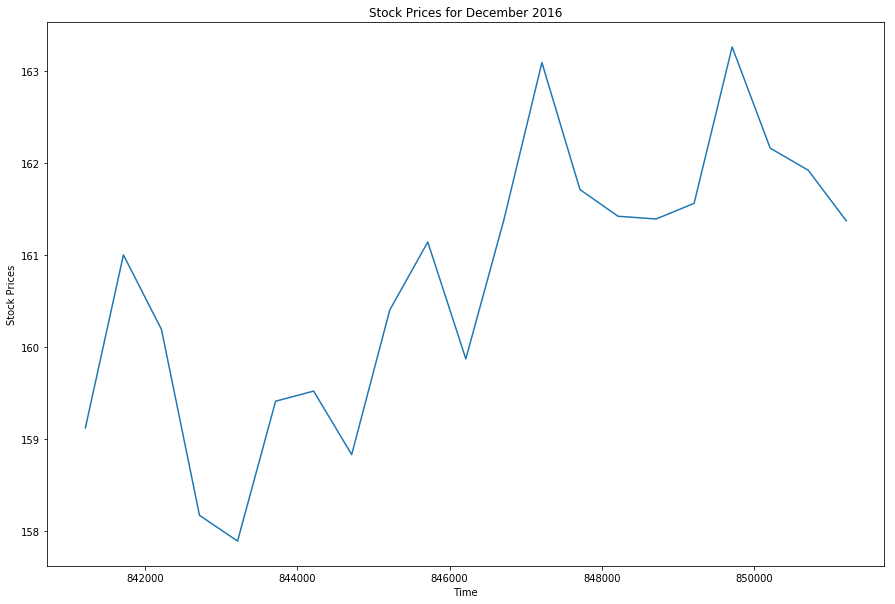

In [143]:
dataset_test['open'].plot(figsize = (15, 10))                       # Testing Set 

plt.title('Stock Prices for December 2016')      

plt.xlabel("Time")

plt.ylabel('Stock Prices')

In [144]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [145]:
###### Getting the predicted stock price of December 2016 ########

# Concatenating the training set and test set

dataset_total_UNH = pd.concat((dataset_train['open'], 
                           dataset_test['open']), axis = 0)

inputs_UNH = dataset_total_UNH[len(dataset_total_UNH) - len(dataset_test) - 60:].values   # Inputs we need to predict the stock price of December 2016

In [146]:
# Reshaping to get the right np shape

inputs_UNH = inputs_UNH.reshape(-1, 1)

inputs_UNH = sc.transform(inputs_UNH)

# Creating special dataset structure for our test set

X_test_UNH = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_UNH.append(inputs_UNH[i - 60:i, 0])
     
X_test_UNH = np.array(X_test_UNH)

X_test_UNH = np.reshape(X_test_UNH, (20, 60, 1))

In [147]:
predicted_stock_price_UNH = regressor.predict(X_test_UNH)        # Predicting the stock price

predicted_stock_price_UNH = sc.inverse_transform(predicted_stock_price_UNH)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

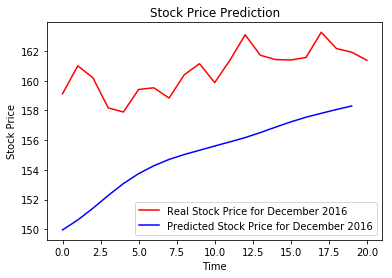

In [148]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_UNH, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

We have correctly predicted the trend of the UNH stock price for the month of December 2016. 

In [149]:
# Computing the RMSE
rmse_UNH = math.sqrt(mean_squared_error(real_stock_price[0:20, 0], predicted_stock_price_UNH))
r = np.ptp(real_stock_price[0:20, 0], axis = 0)

# Relative RMSE
rmse_UNH/r

1.1042653454279063

In [150]:
# Increasing the number of epochs, while running the RNN, in order to get a better accuracy and rmse: 

regressor_2 = Sequential()

regressor_2.add(LSTM(units = 50, return_sequences = True, input_shape = (60 , 1)))
regressor_2.add(Dropout(0.2))

# Adding the second LSTM layer and some dropout regularisation 

regressor_2.add(LSTM(units = 50, return_sequences = True))
regressor_2.add(Dropout(0.2))

# Adding the third LSTM layer and some dropout regularisation 

regressor_2.add(LSTM(units = 50, return_sequences = True))
regressor_2.add(Dropout(0.2))

# Adding the fourth LSTM layer and some dropout regularisation 

regressor_2.add(LSTM(units = 50))


# Adding the output layer

regressor_2.add(Dense(units = 1))

regressor_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [152]:
regressor_2.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Started with a loss of 0.0224
# Ended with a loss of 0.00033

Epoch 1/100
1681/1681 [==============================] - 41s 24ms/step - loss: 0.0224
Epoch 2/100
1681/1681 [==============================] - 28s 17ms/step - loss: 0.0011
Epoch 3/100
1681/1681 [==============================] - 29s 17ms/step - loss: 8.8861e-04
Epoch 4/100
1681/1681 [==============================] - 28s 17ms/step - loss: 9.3429e-04
Epoch 5/100
1681/1681 [==============================] - 29s 17ms/step - loss: 9.7128e-04
Epoch 6/100
1681/1681 [==============================] - 28s 17ms/step - loss: 9.5273e-04
Epoch 7/100
1681/1681 [==============================] - 28s 17ms/step - loss: 9.8140e-04
Epoch 8/100
1681/1681 [==============================] - 29s 17ms/step - loss: 9.6490e-04
Epoch 9/100
1681/1681 [==============================] - 28s 17ms/step - loss: 8.7785e-04
Epoch 10/100
1681/1681 [==============================] - 28s 17ms/step - loss: 7.4294e-04
Epoch 11/100
1681/1681 [==============================] - 28s 17ms/step - loss: 7.3151e-04
Epoch 12/100
168

1681/1681 [==============================] - 29s 17ms/step - loss: 4.4085e-04
Epoch 92/100
1681/1681 [==============================] - 28s 17ms/step - loss: 4.3938e-04
Epoch 93/100
1681/1681 [==============================] - 28s 17ms/step - loss: 3.7882e-04
Epoch 94/100
1681/1681 [==============================] - 28s 17ms/step - loss: 3.6358e-04
Epoch 95/100
1681/1681 [==============================] - 28s 17ms/step - loss: 3.2877e-04
Epoch 96/100
1681/1681 [==============================] - 28s 17ms/step - loss: 3.8884e-04
Epoch 97/100
1681/1681 [==============================] - 28s 17ms/step - loss: 3.8736e-04
Epoch 98/100
1681/1681 [==============================] - 29s 17ms/step - loss: 3.9526e-04
Epoch 99/100
1681/1681 [==============================] - 29s 17ms/step - loss: 3.5795e-04
Epoch 100/100
1681/1681 [==============================] - 32s 19ms/step - loss: 3.3052e-04


In [153]:
inputs_UNH = dataset_total_UNH[len(dataset_total_UNH) - len(dataset_test) - 60:].values
inputs_UNH = inputs_UNH.reshape(-1, 1)

inputs_UNH = sc.transform(inputs_UNH)

# Creating special dataset structure for our test set

X_test_UNH = []     # This will be the inputs we need to predict the value of the test set

# Since the test set only contains 20 financial days, our range will be from 60 to 80

for i in range(60, 80):
    X_test_UNH.append(inputs_UNH[i - 60:i, 0])
     
X_test_UNH = np.array(X_test_UNH)

X_test_UNH = np.reshape(X_test_UNH, (20, 60, 1))

In [154]:
predicted_stock_price_UNH = regressor_2.predict(X_test_UNH)        # Predicting the stock price

predicted_stock_price_UNH = sc.inverse_transform(predicted_stock_price_UNH)

Text(0.5, 1.0, 'Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

<function matplotlib.pyplot.show(*args, **kw)>

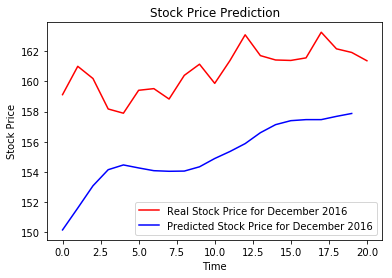

In [155]:
# Visualizing the results 

plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for December 2016')    

plt.plot(predicted_stock_price_UNH, color = 'blue', label = 'Predicted Stock Price for December 2016')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show

The trend is captured better than the trend captured before. 

In [156]:
# Computing the RMSE
rmse_UNH_2 = math.sqrt(mean_squared_error(real_stock_price[0:20, 0], predicted_stock_price_UNH))
r = np.ptp(real_stock_price[0:20, 0], axis = 0)

# Relative RMSE
rmse_UNH_2/r

1.0808460224509004

# Conclusion:

We have correctly predicted the trend of the stock prices, for the month of December 2016, in our Recurrent Neural Network model by analyzing the past 6 years of opening stock prices performance. With the Long Short-Term Memory algorithm, an average relative RMSE value of 0.48 is achieved. 
In order to further improve the model and its predictions, there is scope of adding the opening stock prices of those companies which might be strongly correlated with the opening stock prices of the companies in question.
In general, the problem of stock market prediction is very challenging, and very high accuracies is not achievable. Nevertheless, machine learning techniques can provide reasonable market movement predictions, that can be used by investors.